In [1]:
import numpy as np
from matplotlib import pyplot as plt

def f(t):
    """The function to predict."""
    T=30
    t = t.T[0]
    phi = (2*np.pi)/T*t
    r = 10+2*np.sin(phi*5)**2*0
    x = r * np.sin(phi)+(t/20)
    y = r * np.cos(phi)+(t/10)
    return x,y

np.r_[np.empty(0),[1]]


array([1.])

In [2]:
# Event distance between victim and hunter reduced and victim, hunter velocities are known

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

def create_graph(name):
    plt.ion()
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111)
    ax.set_title(name,fontsize=30)
    hunter_line, = ax.plot(0, 0, 'r-',label = 'Hunter trajectory')
    hunter_position_point, = ax.plot(0, 0, 'r*',label = 'Hunter position')
    victim_line, = ax.plot(0, 0, 'g-',label = 'Victim trajectory')
    victim_position_point, = ax.plot(0, 0, 'g*',label = 'Victim position')
    
    ax.legend()
    graph = (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax
    return graph

def update_graph(graph,hunter_trajectoty,victim_trajectoty):
    (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax = graph
    x = np.r_[hunter_trajectoty[0],victim_trajectoty[0]]
    y = np.r_[hunter_trajectoty[1],victim_trajectoty[1]]
    ax.set_xlim(x.min(),x.max())
    ax.set_ylim(y.min(),y.max())
    hunter_line.set_data(*hunter_trajectoty)
    hunter_position_point.set_data(*hunter_trajectoty.T[-1])
    victim_line.set_data(*victim_trajectoty)
    victim_position_point.set_data(*victim_trajectoty.T[-1])
    fig.canvas.draw()
    #sleep(0.01)

def finish_graph(graph,t):
    (hunter_line,hunter_position_point,victim_line,victim_position_point),fig, ax = graph
    ax.set_title('Prey has caught in '+str(t)+' steps',fontsize=30)
    fig.canvas.draw()
    
def get_hunter_info(hunter_trajectoty,victim_trajectoty):
    if len(hunter_trajectoty)<2:
        hunter_shift = np.array([0,0])
        victim_shift = np.array([0,0])
        is_hunter_closer = 0
    else:
        hunter_shift = hunter_trajectoty[-1]-hunter_trajectoty[-2]
        victim_shift = victim_trajectoty[-1]-victim_trajectoty[-2]
        
        is_hunter_closer = (np.linalg.norm(hunter_trajectoty[-2]-victim_trajectoty[-2])\
                           -np.linalg.norm(hunter_trajectoty[-1]-victim_trajectoty[-1]))\
                            >0
    victim_direction = victim_shift/np.linalg.norm(victim_shift)

    return is_hunter_closer,victim_direction
    
def model_hunter_learnong(name,hunter_policy,victim_policy, hunter_start_position, victim_strat_position,catch_distance=1):
    graph = create_graph(name)
    t = 0
    hunter_trajectoty = np.array([hunter_start_position])
    victim_trajectoty = np.array([victim_strat_position])
    is_hunter_closer_events = np.empty(0)
    victim_directions_array = np.empty([0, 2])
    while True:
        
        victim_position = victim_policy(hunter_trajectoty,victim_trajectoty,t)
        is_hunter_closer, victim_direction = get_hunter_info(hunter_trajectoty,victim_trajectoty)
        victim_directions_array = np.r_[victim_directions_array,[victim_direction]]
        is_hunter_closer_events = np.r_[is_hunter_closer_events,[is_hunter_closer]]
        hunter_position = hunter_policy(is_hunter_closer_events,victim_directions_array,hunter_trajectoty,t)
        hunter_trajectoty = np.r_[hunter_trajectoty,[hunter_position]]
        victim_trajectoty = np.r_[victim_trajectoty,[victim_position]]

        update_graph(graph,hunter_trajectoty.T,victim_trajectoty.T)
        t +=1
        diatance = np.linalg.norm(hunter_position-victim_position)
        if diatance<=catch_distance:
            finish_graph(graph,t)
            return
            
        



In [3]:
def random_hunter_policy(is_hunter_closer_events,victim_directions_array,hunter_trajectoty,t):
    hunter_position = hunter_trajectoty[-1]
    if len(hunter_trajectoty)>=2:
        hunter_shift = hunter_trajectoty[-1]-hunter_trajectoty[-2]
    else:
        hunter_shift = np.array([0,0])
    
    hunter_direction = (hunter_shift)/np.linalg.norm(hunter_shift)
    victim_direction = victim_directions_array[-1]
    is_hunter_closer = is_hunter_closer_events[-1]
    velocity = 2
    if is_hunter_closer:
        new_hunter_direction = hunter_direction
    else:
        rand_vect = np.random.rand(2)-1/2
        new_hunter_direction= rand_vect/np.linalg.norm(rand_vect)
    
    new_hunter_position = hunter_position+new_hunter_direction*velocity
    return new_hunter_position

def simple_victim_policy(hunter_trajectoty,victim_trajectoty,t):
    def f(t):
        phi = (2*np.pi)/30*t
        r = 10+2*np.sin(phi*2)**2*0

        x = r * np.sin(phi)#+(t/20)
        y = r * np.cos(phi)#+(t/10)
        return x,y
    new_victim_position = f(t)
    return new_victim_position

<IPython.core.display.Javascript object>


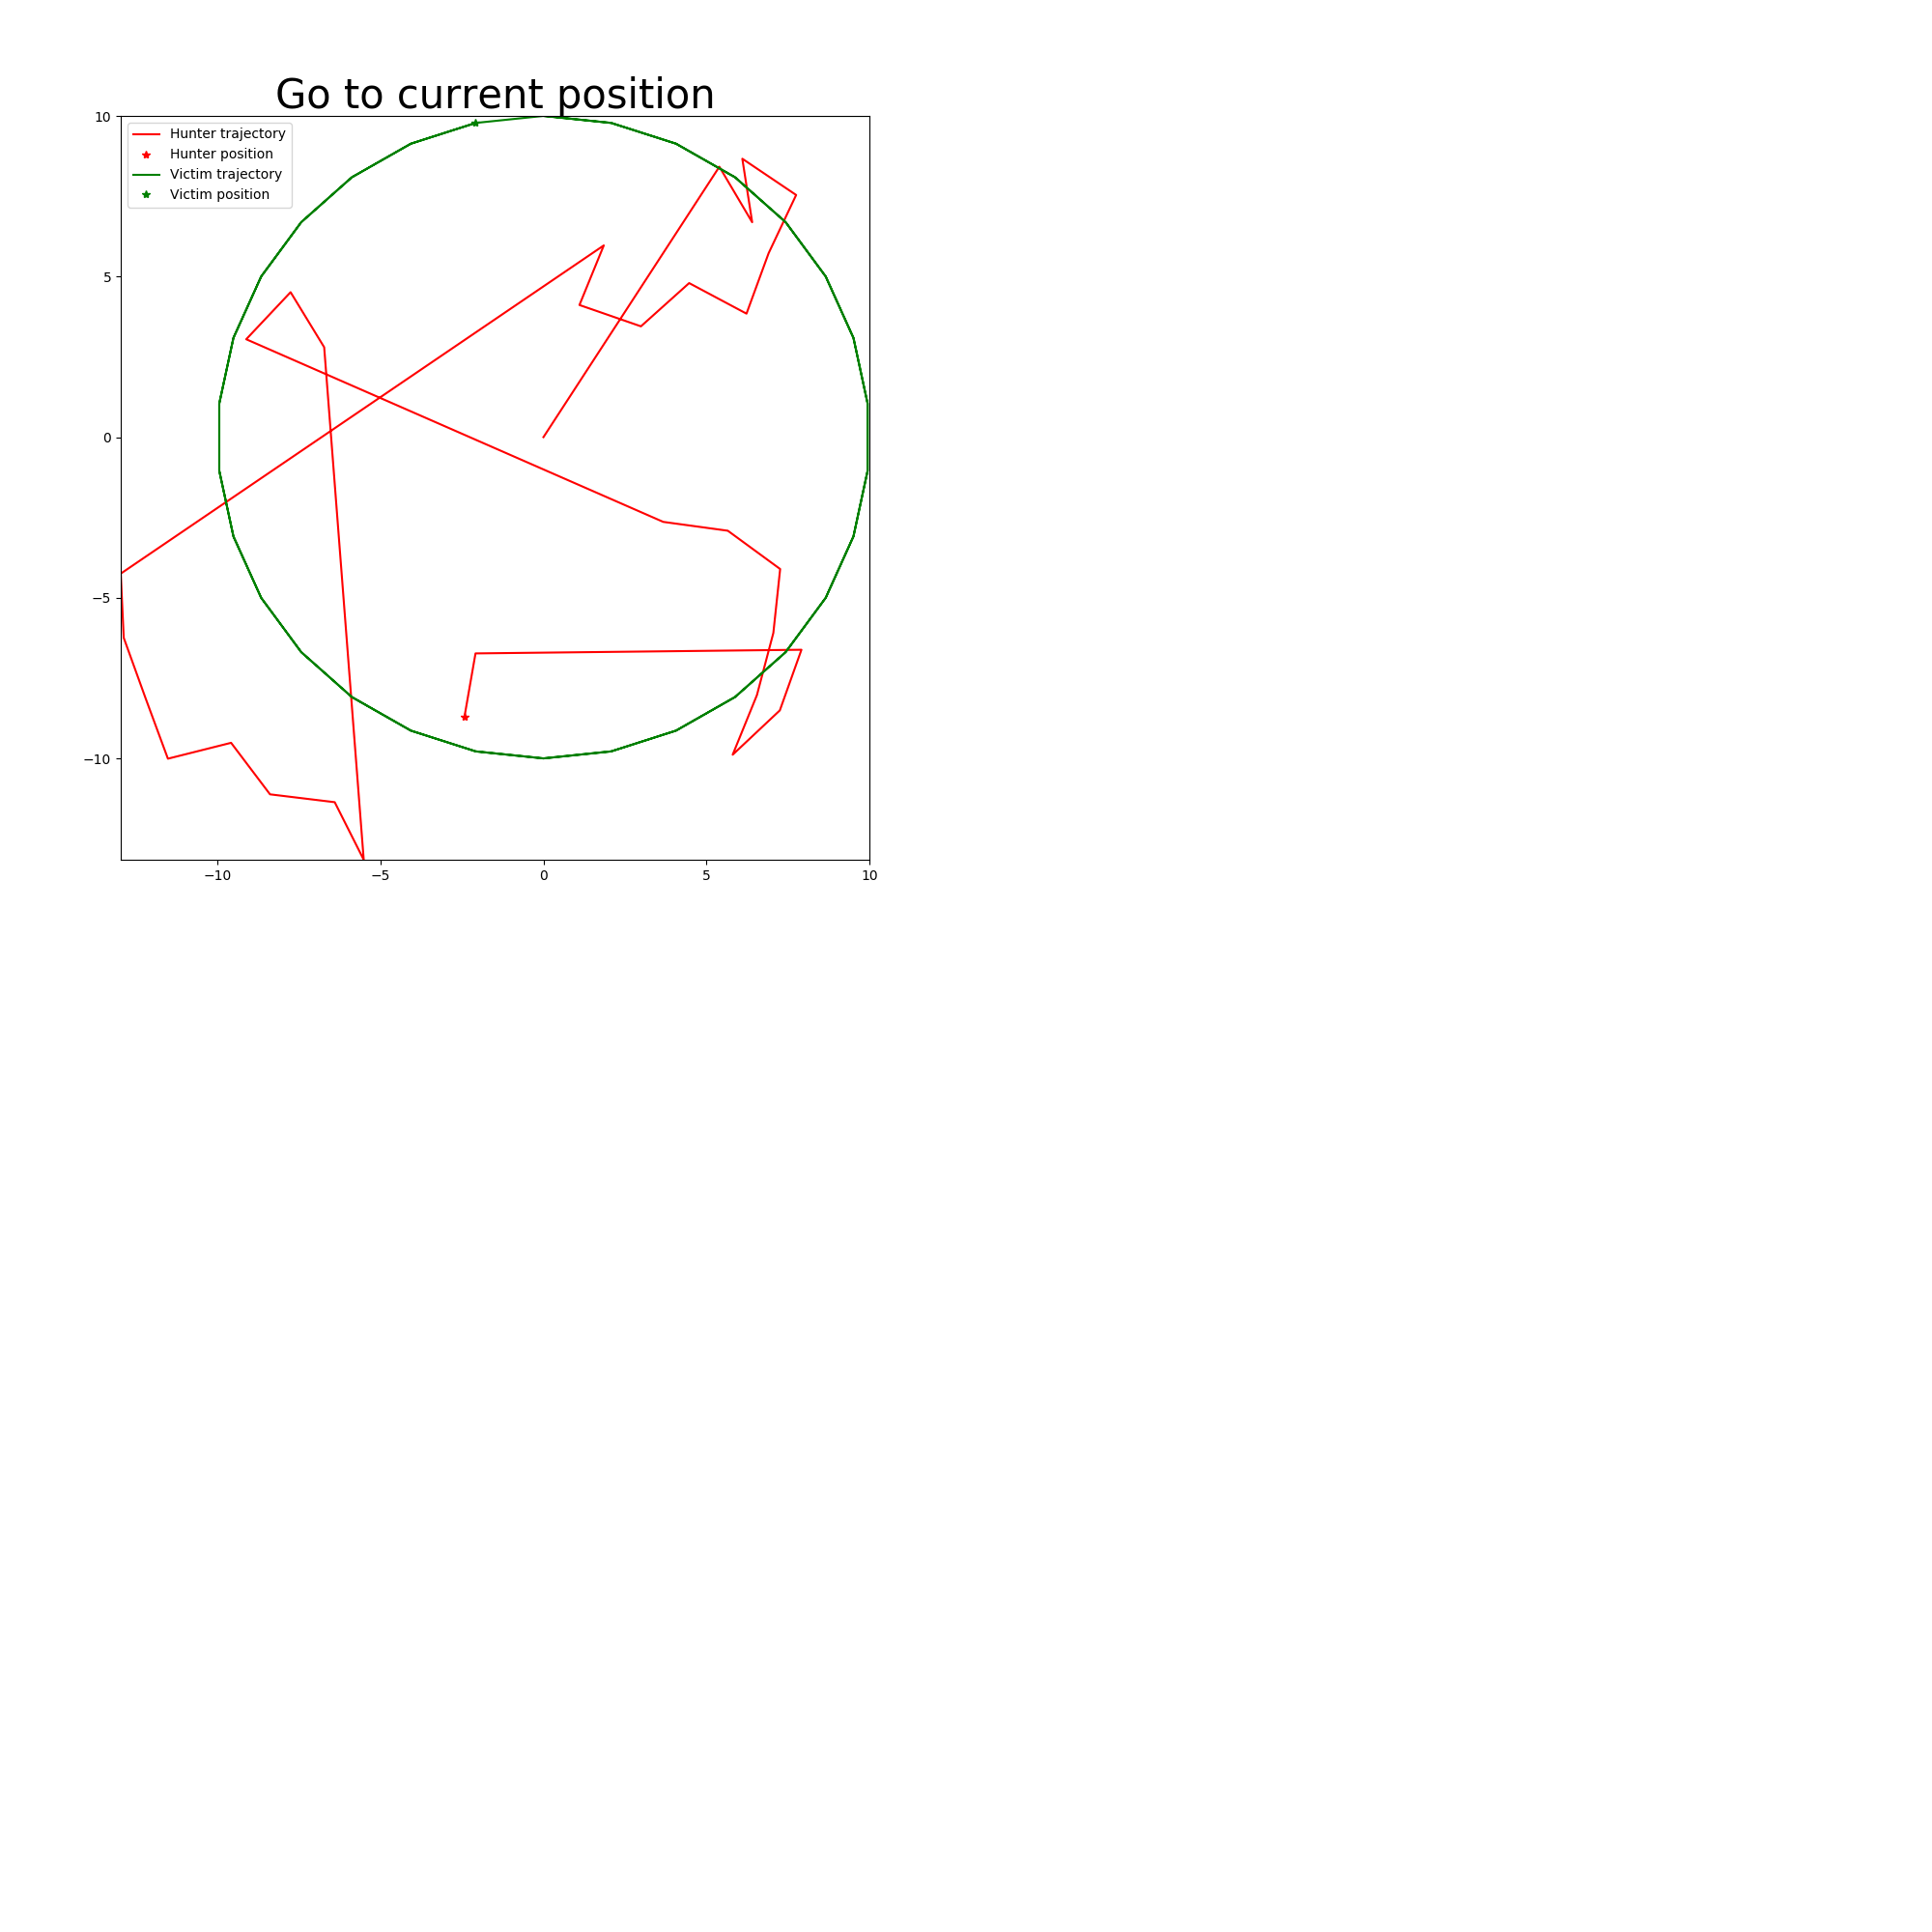

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


KeyboardInterrupt: 

In [4]:
model_hunter_learnong('Go to current position',random_hunter_policy,simple_victim_policy,[0,0],[10,10],catch_distance=0)

<IPython.core.display.Javascript object>


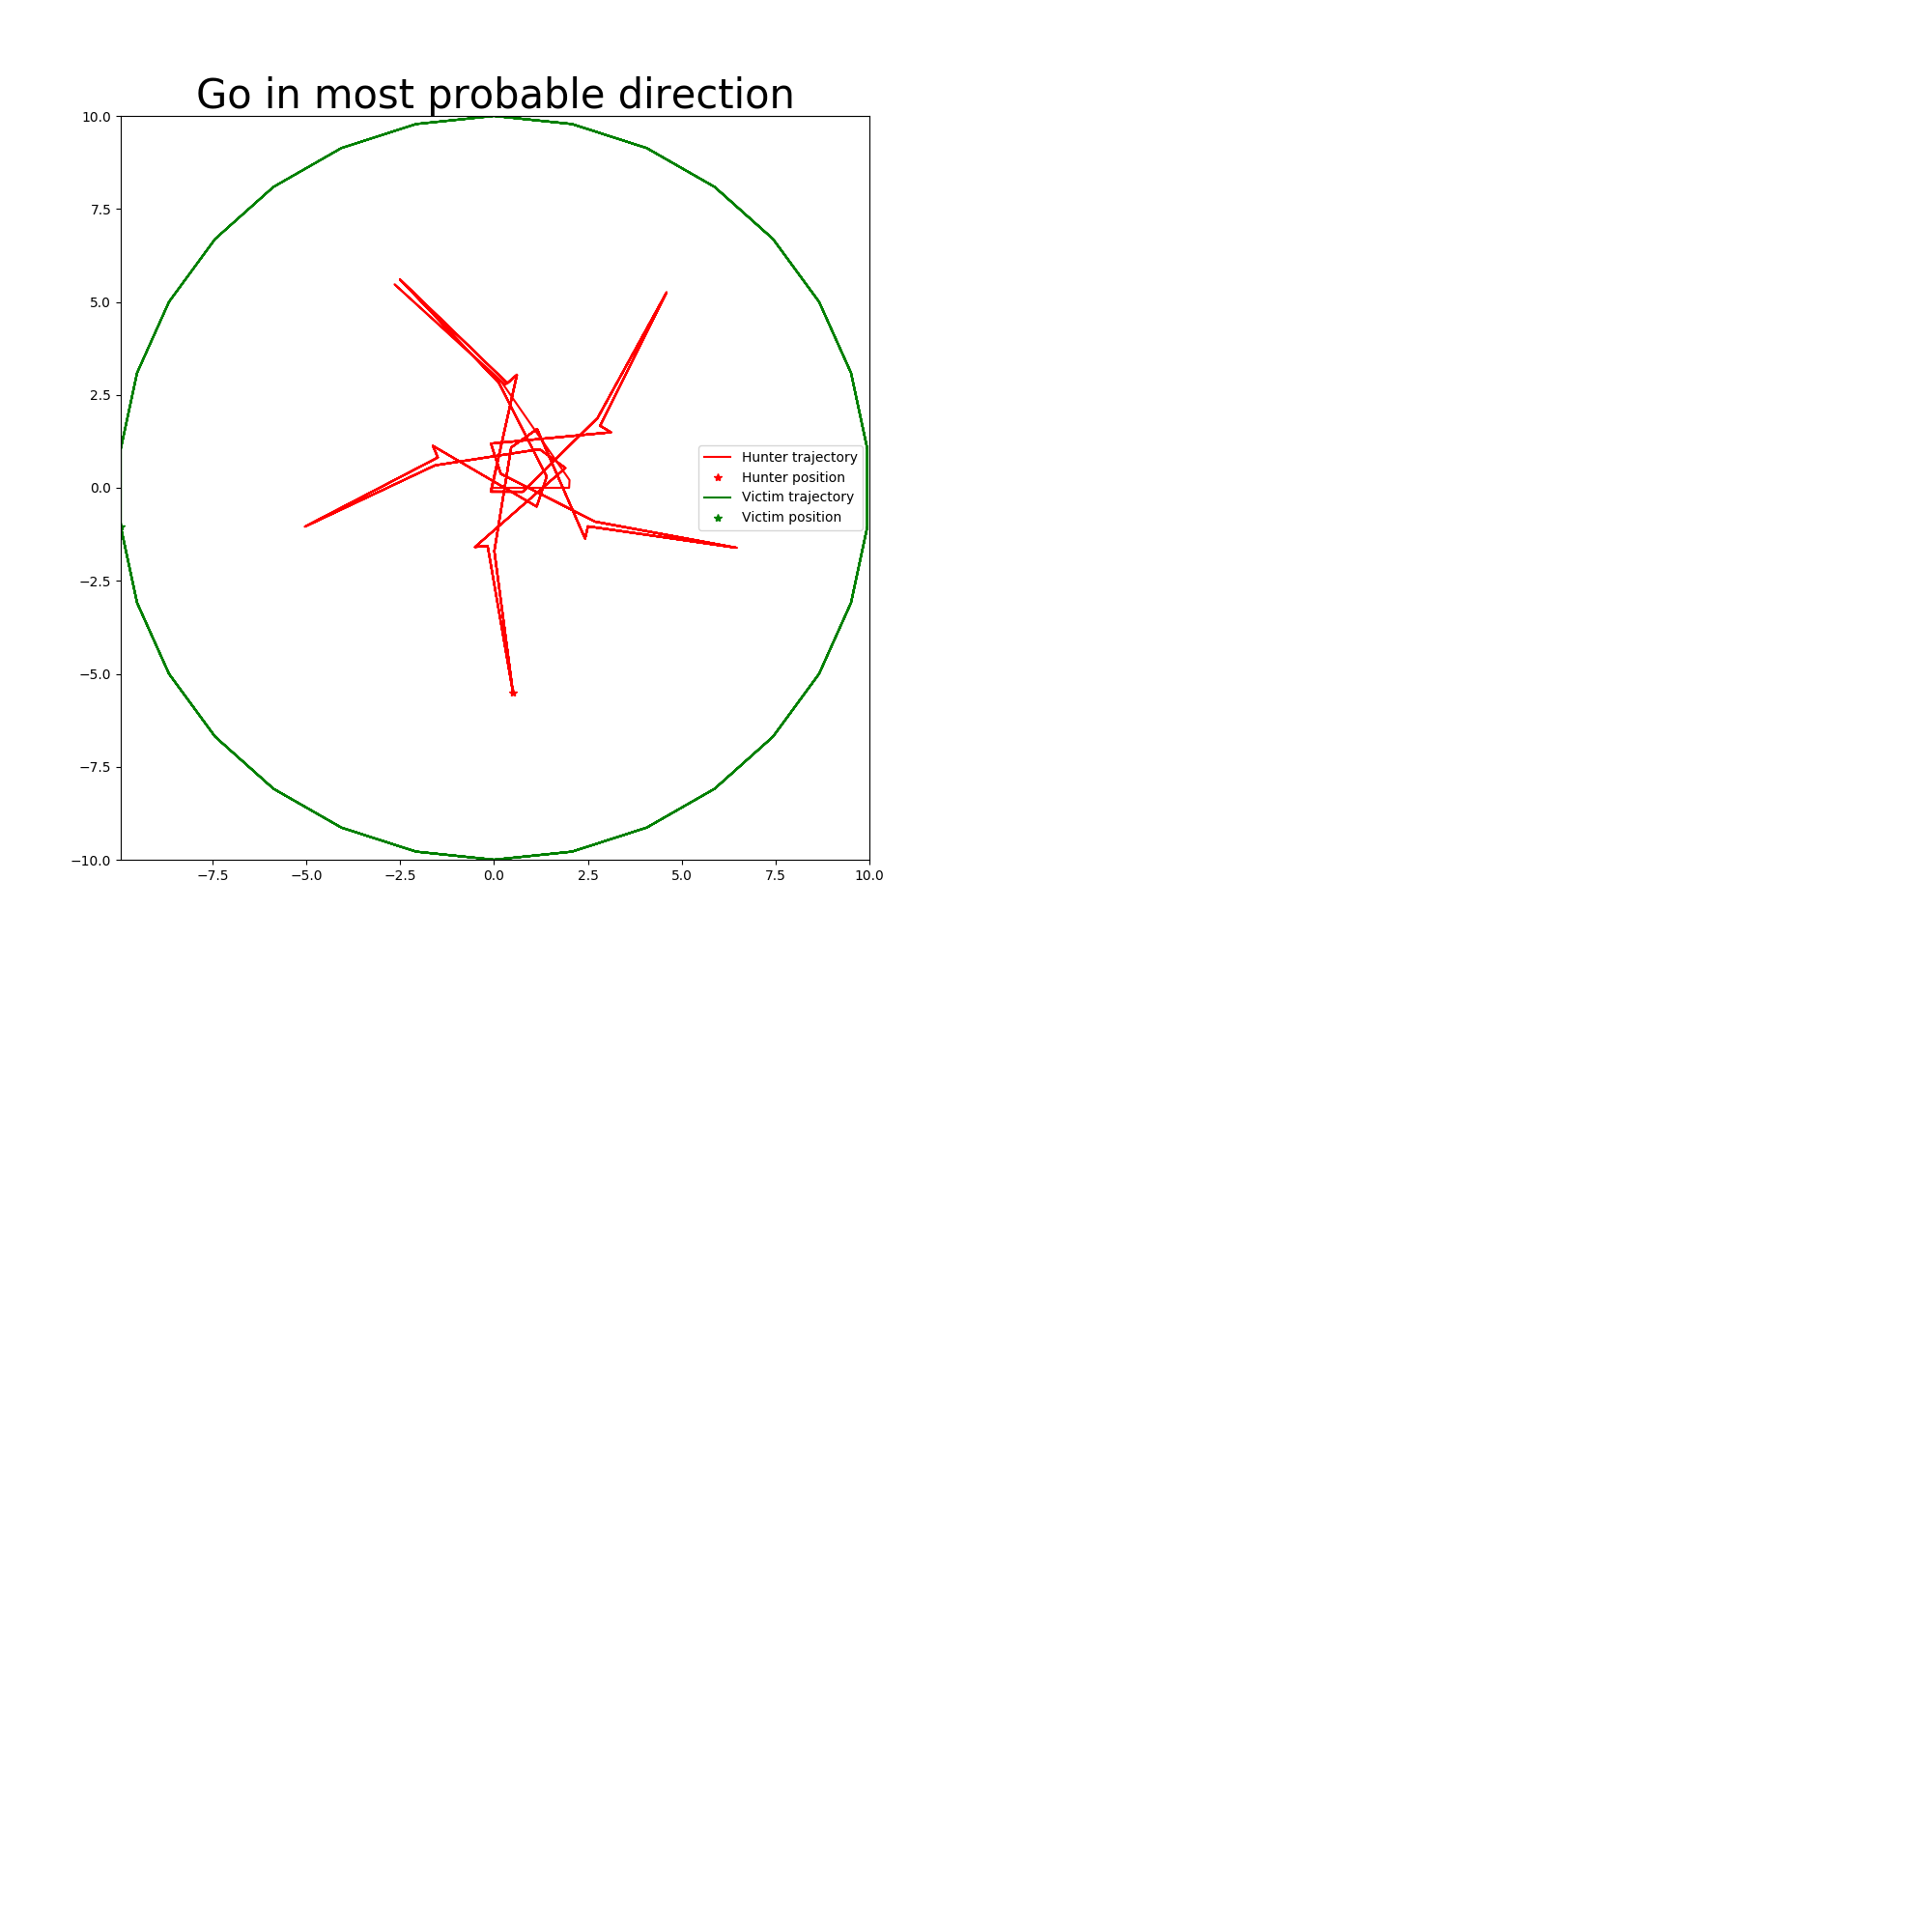

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [123]:

def most_probable_direction_hunter_policy(is_hunter_closer_events,victim_directions_array,hunter_trajectoty,t):
    hunter_position = hunter_trajectoty[-1]
    if len(hunter_trajectoty)>=2:
        hunter_shift = hunter_trajectoty[-1]-hunter_trajectoty[-2]
    else:
        hunter_shift = np.array([0,1])
    if not all(hunter_shift == np.array([0,0])):
        hunter_direction = (hunter_shift)/np.linalg.norm(hunter_shift)
    else:
        hunter_direction = np.array([0,0])
    victim_direction = victim_directions_array[-1]
    is_hunter_closer = is_hunter_closer_events[-1]
    velocity = 2
    if np.isnan(victim_direction[0]):
        new_hunter_direction = np.array([0,0])
    elif is_hunter_closer:
        new_hunter_direction = (hunter_direction-victim_direction)
    else:
        new_hunter_direction= -(hunter_direction-victim_direction)
    
    new_hunter_position = hunter_position+new_hunter_direction*velocity
    return new_hunter_position

model_hunter_learnong('Go in most probable direction',most_probable_direction_hunter_policy,simple_victim_policy,[0,0],[10,10])


<IPython.core.display.Javascript object>


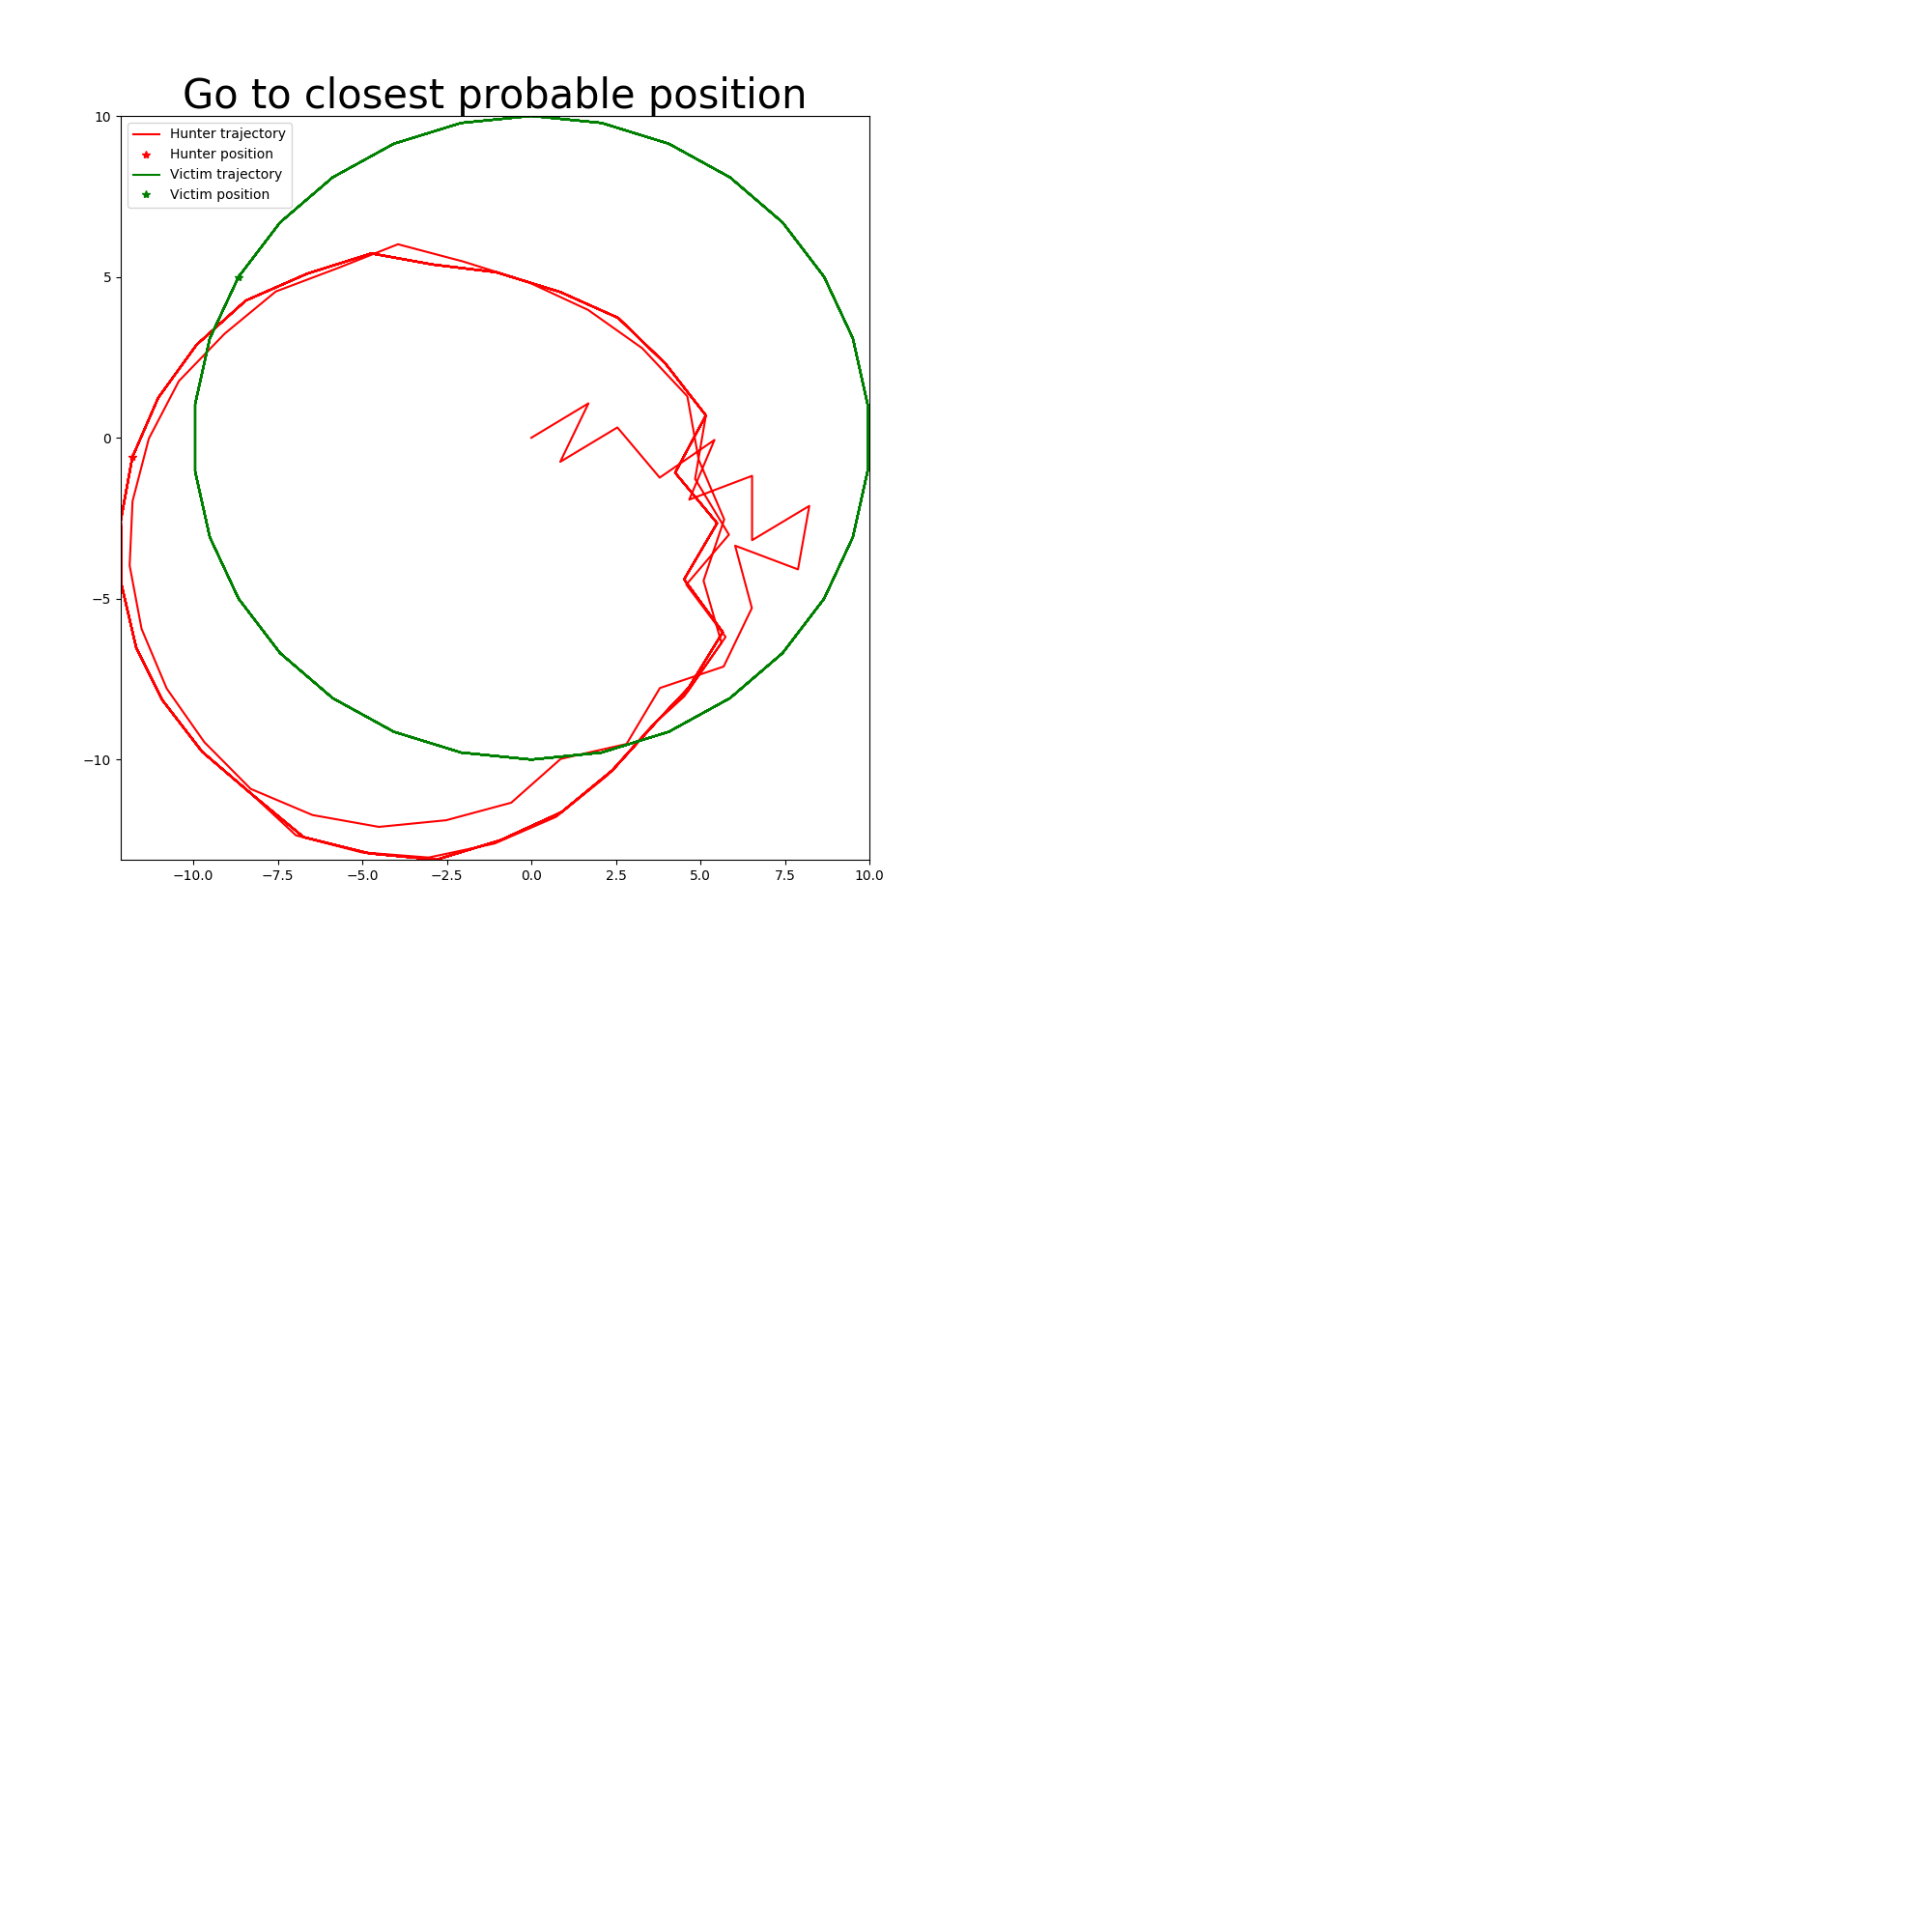

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [6]:
def create_conditions(is_hunter_closer_events,victim_directions_array,hunter_trajectoty,order = 2000):
    hunter_velocity_array = np.diff(hunter_trajectoty,axis = 0)
#     if(len(predicted_victim_positions)>0):
#         predicted_victim_velocities = np.r_[[[0,0]],np.diff(predicted_victim_positions,axis = 0)]
#     else:
#         predicted_victim_velocities = [[1,1]]
    victim_velocity_array = victim_directions_array[1:]*2
    cum_hunter_velocity = np.r_[[[0,0]],np.cumsum(hunter_velocity_array[::-1],axis = 0)][:-1]
    cum_victim_velocity = np.r_[[[0,0]],np.cumsum(victim_velocity_array[::-1],axis = 0)][:-1]
    direction = is_hunter_closer_events*2-1
    
    def conditions(hunter_distance_to_victim):
        distance_to_victim = hunter_distance_to_victim-cum_victim_velocity+cum_hunter_velocity
        next_shift = victim_directions_array[1:][::-1]-hunter_velocity_array[::-1]
        return (((distance_to_victim*next_shift).sum(axis = 1)-(next_shift*next_shift).sum(axis = 1)/2)*direction[1:])[:order]
    return conditions

from scipy.optimize import minimize, NonlinearConstraint
def find_closest_point(conditions):
    x0 = [0,0]
    con = {'type': 'ineq', 'fun': conditions}
    res = minimize(lambda x: (np.linalg.norm(x)-2)**2,x0,constraints=con,method = 'COBYLA')
#     print(conditions(res.x))
    return res.x
    

# predicted_victim_positions = []
def closest_probable_position_hunter_policy(is_hunter_closer_events,victim_directions_array,hunter_trajectoty,t):
    
    conditions = create_conditions(is_hunter_closer_events,victim_directions_array,hunter_trajectoty)
    closest_victim_position = find_closest_point(conditions)
#     global predicted_victim_positions
#     predicted_victim_positions += closest_victim_position,
    hunter_position = hunter_trajectoty[-1]
    velocity = 2
    if np.linalg.norm(closest_victim_position)>velocity:
        new_hunter_position = hunter_position + velocity*closest_victim_position/np.linalg.norm(closest_victim_position)   
    else:
        new_hunter_position = hunter_position+closest_victim_position
#     new_hunter_position = hunter_position+closest_victim_position
    return new_hunter_position

model_hunter_learnong('Go to closest probable position',closest_probable_position_hunter_policy,simple_victim_policy,[0,0],[10,10],catch_distance=0)

